# EDA

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings("ignore")

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# reading dataset and printing data
stock = pd.read_excel("Stock_Price_data_set.xlsx")
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [4]:
# printing last 5 rows of dataset
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500.0
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300.0
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400.0


In [5]:
# getting dimensions of dataset
stock.shape

(1009, 7)

In [7]:
# getting additional information of dataset
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [8]:
# getting statistical information of dataset
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [9]:
# checking for missing values
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# checking for duplicate values
stock.duplicated().sum()

0

In [11]:
# dropping unncessary column
stock.drop(['Date','Adj Close'], axis = 1, inplace = True) # They are not needed for the regression model.

In [12]:
stock.head()

,Open,High,Low,Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100.0
1,247.699997,266.700012,245.000000,265.720001,12595800.0
2,266.579987,272.450012,264.329987,264.559998,8981500.0
3,267.079987,267.619995,250.000000,250.100006,9306700.0
4,253.850006,255.800003,236.110001,249.470001,16906900.0


In [13]:
# checking for correlation among different features
stock.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,1.000000


# Data Visualization

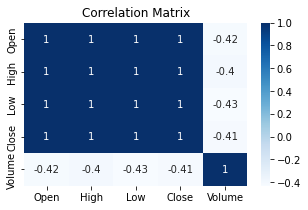

In [14]:
# plotting graph for correlation
plt.figure(figsize=(5,3))
sns.heatmap(stock.corr(), annot = True, cmap = plt.cm.Blues)
plt.title("Correlation Matrix")
plt.show()

It is observed that most of the features are positively correlated to each other.

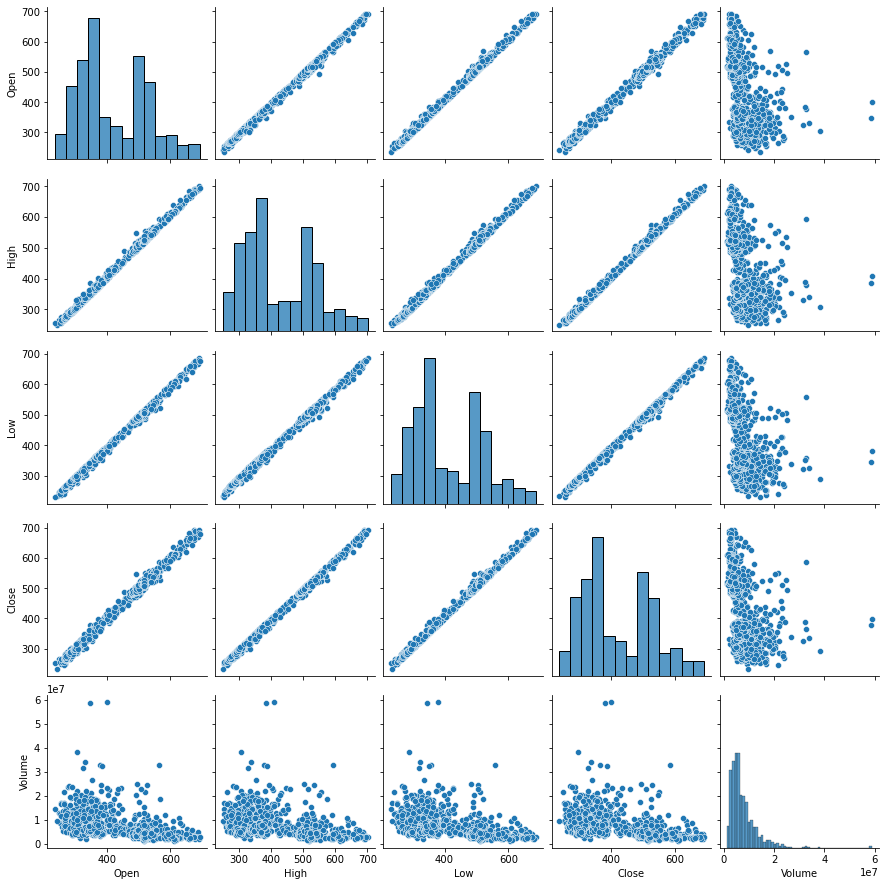

In [15]:
# creating pair plot
sns.pairplot(stock)

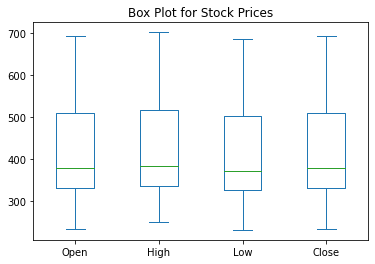

In [16]:
# creating box plot for different features
stock[['Open','High','Low','Close']].plot(kind = 'box')
plt.title("Box Plot for Stock Prices")
plt.show()

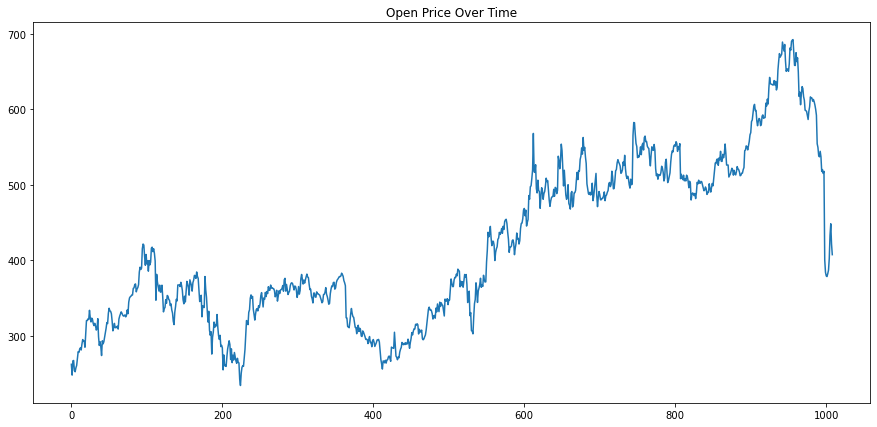

In [17]:
# Visualizing data for 'Open' feature
stock['Open'].plot(figsize =(15,7),title="Open Price Over Time")
plt.show()

<AxesSubplot:title={'center':'Close Price Over Time'}>

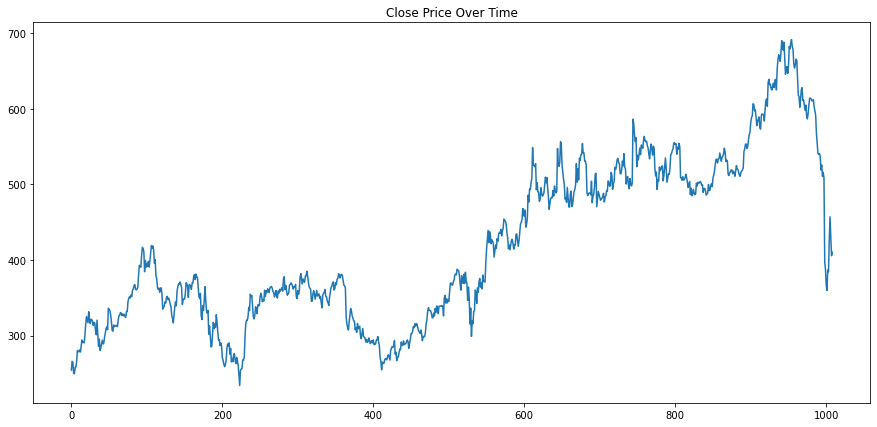

In [18]:
# Visualizing data for 'Close' feature
stock['Close'].plot(figsize =(15,7), title="Close Price Over Time")

# Splitting of Features

In [22]:
# splitting independent and target variables
x = stock.drop(['Close'], axis=1) 
y = stock['Close']
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (1009, 4)
Shape of y: (1009,)


In [23]:
# splitting dataset into training data and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=50)

# Linear Regression

In [24]:
# Applying linear regression algorithm for prediction
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
y_pred

array([273.39026953, 488.2279506 , 592.93751188, 299.08017617,
       519.47935456, 636.33583765, 366.18751495, 284.66342387,
       494.54089913, 501.90683974, 543.42631351, 503.84613794,
       359.19706795, 330.04574767, 517.16231559, 514.80566342,
       351.74549927, 288.0308123 , 353.90133286, 493.06801665,
       407.42680985, 503.0555909 , 375.62120823, 292.51364875,
       538.35334813, 346.33349507, 489.00953174, 470.27100717,
       334.47995142, 544.87801039, 434.39775855, 294.96141746,
       284.07786645, 555.35731986, 358.35289183, 628.74822957,
       415.36804072, 504.35877129, 498.60184629, 378.18962757,
       357.65621105, 309.60759584, 311.83102507, 324.59048542,
       316.27981243, 525.30122679, 440.25604214, 340.78764648,
       332.35558501, 349.32936377, 380.90944272, 310.41047158,
       379.65721646, 627.73481846, 493.54681588, 311.31431027,
       362.37786973, 379.53928681, 483.894223  , 550.35111341,
       481.54707339, 329.0316461 , 338.37237681, 433.65

In [25]:
df = pd.DataFrame({'Actual Stock': ytest,'Predicted Stock': y_pred})
df.head()

,Actual Stock,Predicted Stock
421,270.720001,273.390270
692,487.220001,488.227951
973,605.039978,592.937512
394,296.779999,299.080176
721,519.780029,519.479355


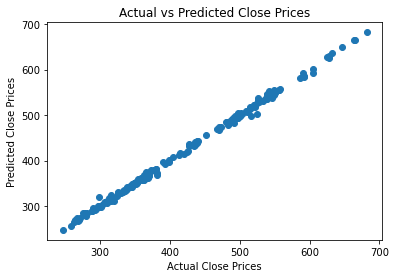

In [26]:
# creating scatter plot between test data and predicted data
plt.scatter(ytest,y_pred)
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title("Actual vs Predicted Close Prices")
plt.show()

In [27]:
graph = df.head(25)

<AxesSubplot:>

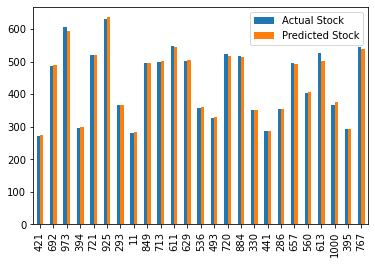

In [28]:
graph.plot(kind='bar')

# Model Performance

In [31]:
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f"Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared Score (R2): {r2}")

# Accuracy score on testing data
score = lr.score(xtest, ytest)
print(f"Accuracy Score: {score * 100:.2f}%")

Model Performance Metrics:
Mean Squared Error (MSE): 21.122027916415057
Mean Absolute Error (MAE): 3.2207411232826577
R-Squared Score (R2): 0.9980215034227895
Accuracy Score: 99.80%


It is observed that the model is giving 99.80% accuracy with Mean Square Error of 21.1, Mean Absolute Error of 3.2 and R2 score of 0.998. These metrics indicate that your linear regression model is performing exceptionally well. Let's break down what each metric means and their implications:

Accuracy (99.80%):

This indicates that your model predictions are very close to the actual values most of the time. An accuracy score this high suggests that the model has learned the relationship between the features and the target variable very well.
Mean Squared Error (MSE = 21.1):

MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. A lower MSE indicates a better fit. In this case, an MSE of 21.1 suggests that, on average, the squared prediction error is low, which is a good sign.
Mean Absolute Error (MAE = 3.2):

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. An MAE of 3.2 indicates that, on average, the model's predictions are 3.2 units away from the actual values.
R-squared (R² = 0.998):

R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value of 0.998 means that 99.8% of the variance in the target variable is explained by the model. This is a very high value, indicating an excellent fit.

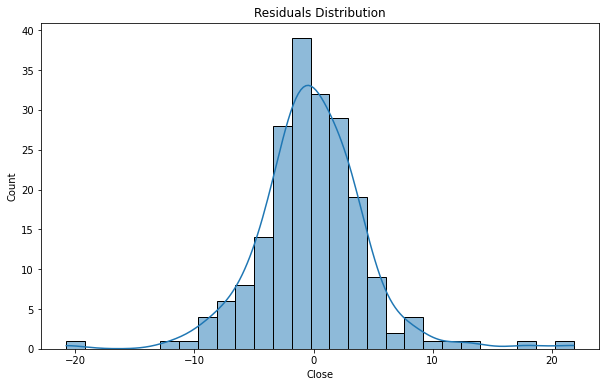

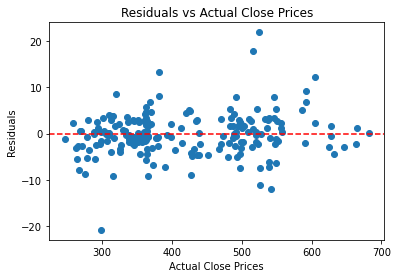

In [32]:
# residual analysis to ensure there are no patterns in the residuals, which would indicate potential issues with the model
residuals = ytest - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

plt.scatter(ytest, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Close Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Close Prices')
plt.show()


Here's what we can infer from the plot:

-Normal Distribution:
The residuals are approximately normally distributed, centered around zero. 
This indicates that the model's errors are unbiased and there is no significant systematic error in the predictions.
The residuals being centered around zero is a good sign. 

-Symmetry:
The plot shows a symmetrical bell-shaped curve, suggesting that the errors are evenly distributed. 
This further supports the idea that the model is performing well.

-No Major Outliers:
There are a few points on the far left and right, but they don't seem to be extreme outliers. 
Most of the residuals fall within a reasonable range, indicating that the model is not making large errors frequently.

However, it's always beneficial to perform a few more checks and possibly improvements:

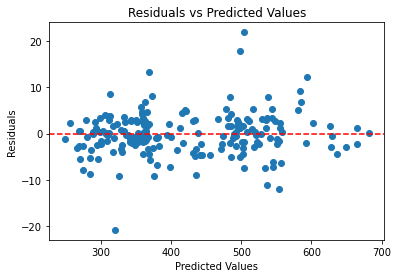

In [35]:
# Homogeneity of Variance: Ensure that the residuals have constant variance. 
# This can be checked by plotting the residuals against the predicted values.
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [36]:
# Cross-Validation: To ensure that the results are consistent across different subsets of the data.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {scores}')
print(f'Average R² Score: {scores.mean()}')

Cross-Validation R² Scores: [0.99312831 0.99351522 0.99473111 0.96873193 0.99650904]
Average R² Score: 0.9893231234397316


Here's a more detailed analysis:

-Consistency:
The R² scores across the different folds are very high and consistent, indicating that the model generalizes well to different subsets of the data.
The slight drop in the fourth fold (0.9687) suggests a bit of variability but still indicates strong performance.

-Robustness:
An average R² score of 0.9893 means that on average, 98.93% of the variance in the target variable is explained by the model. This level of performance is excellent for a regression model.

-Model Reliability:
High and consistent R² scores across the folds imply that the model is reliable and not overfitting to specific subsets of the data.